In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [3]:
import os


In [4]:
dir(os)

['CLD_CONTINUED',
 'CLD_DUMPED',
 'CLD_EXITED',
 'CLD_KILLED',
 'CLD_STOPPED',
 'CLD_TRAPPED',
 'DirEntry',
 'EFD_CLOEXEC',
 'EFD_NONBLOCK',
 'EFD_SEMAPHORE',
 'EX_CANTCREAT',
 'EX_CONFIG',
 'EX_DATAERR',
 'EX_IOERR',
 'EX_NOHOST',
 'EX_NOINPUT',
 'EX_NOPERM',
 'EX_NOUSER',
 'EX_OK',
 'EX_OSERR',
 'EX_OSFILE',
 'EX_PROTOCOL',
 'EX_SOFTWARE',
 'EX_TEMPFAIL',
 'EX_UNAVAILABLE',
 'EX_USAGE',
 'F_LOCK',
 'F_OK',
 'F_TEST',
 'F_TLOCK',
 'F_ULOCK',
 'GRND_NONBLOCK',
 'GRND_RANDOM',
 'GenericAlias',
 'MFD_ALLOW_SEALING',
 'MFD_CLOEXEC',
 'MFD_HUGETLB',
 'MFD_HUGE_16GB',
 'MFD_HUGE_16MB',
 'MFD_HUGE_1GB',
 'MFD_HUGE_1MB',
 'MFD_HUGE_256MB',
 'MFD_HUGE_2GB',
 'MFD_HUGE_2MB',
 'MFD_HUGE_32MB',
 'MFD_HUGE_512KB',
 'MFD_HUGE_512MB',
 'MFD_HUGE_64KB',
 'MFD_HUGE_8MB',
 'MFD_HUGE_MASK',
 'MFD_HUGE_SHIFT',
 'Mapping',
 'MutableMapping',
 'NGROUPS_MAX',
 'O_ACCMODE',
 'O_APPEND',
 'O_ASYNC',
 'O_CLOEXEC',
 'O_CREAT',
 'O_DIRECT',
 'O_DIRECTORY',
 'O_DSYNC',
 'O_EXCL',
 'O_FSYNC',
 'O_LARGEFILE',
 'O_N

In [5]:
file_path = '/home/daohuong65/DSS/database/merged_data.csv'

In [6]:
df = pd.read_csv(file_path)

In [7]:
print(df)

                                                Comment  Stars Sentiment
0     I completed running New York Marathon requeste...    1.0  Negative
1     My appointment time auto repairs required earl...    1.0  Negative
2     Whether I using Uber ride service Uber Eats or...    1.0  Negative
3     Why hard understand I trying retrieve Uber cab...    1.0  Negative
4     I South Beach FL I staying major hotel ordered...    1.0  Negative
...                                                 ...    ...       ...
3795  everyone knows uber  is fast but when you had ...    2.0  Negative
3796  For a service that asks for your credit card n...    1.0  Negative
3797  great service, but hiring drivers who do not k...    2.0  Negative
3798  Uber has several problems that make it a poor ...    1.0  Negative
3799  Uber is kind of like magic. You punch a few bu...    5.0  Positive

[3800 rows x 3 columns]


In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Comment,Stars,Sentiment
2903,my promos return back while i can ride,NaN,NaN
2904,my promos return back while i can ride,NaN,NaN
2905,my promos return back while i can ride,NaN,NaN
2907,my promos return back while i can ride,NaN,NaN


In [9]:
# Drop duplicates in place, keeping the first occurrence
df.drop_duplicates(inplace=True)

In [10]:
df

,Comment,Stars,Sentiment
0,I completed running New York Marathon requeste...,1.0,Negative
1,My appointment time auto repairs required earl...,1.0,Negative
2,Whether I using Uber ride service Uber Eats or...,1.0,Negative
3,Why hard understand I trying retrieve Uber cab...,1.0,Negative
4,I South Beach FL I staying major hotel ordered...,1.0,Negative
...,...,...,...
3795,everyone knows uber is fast but when you had ...,2.0,Negative
3796,For a service that asks for your credit card n...,1.0,Negative
3797,"great service, but hiring drivers who do not k...",2.0,Negative
3798,Uber has several problems that make it a poor ...,1.0,Negative


In [11]:
# Hiển thị số lượng giá trị null dưới dạng bảng
null_summary = df.isnull().sum().reset_index()
null_summary.columns = ['Column', 'Null Values']
print('\nSummary of null values:')
print(null_summary)


Summary of null values:
      Column  Null Values
0    Comment            0
1      Stars          117
2  Sentiment          117


/tmp/ipykernel_1453/3337596039.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Null Values', data=nulls_df, palette='viridis')


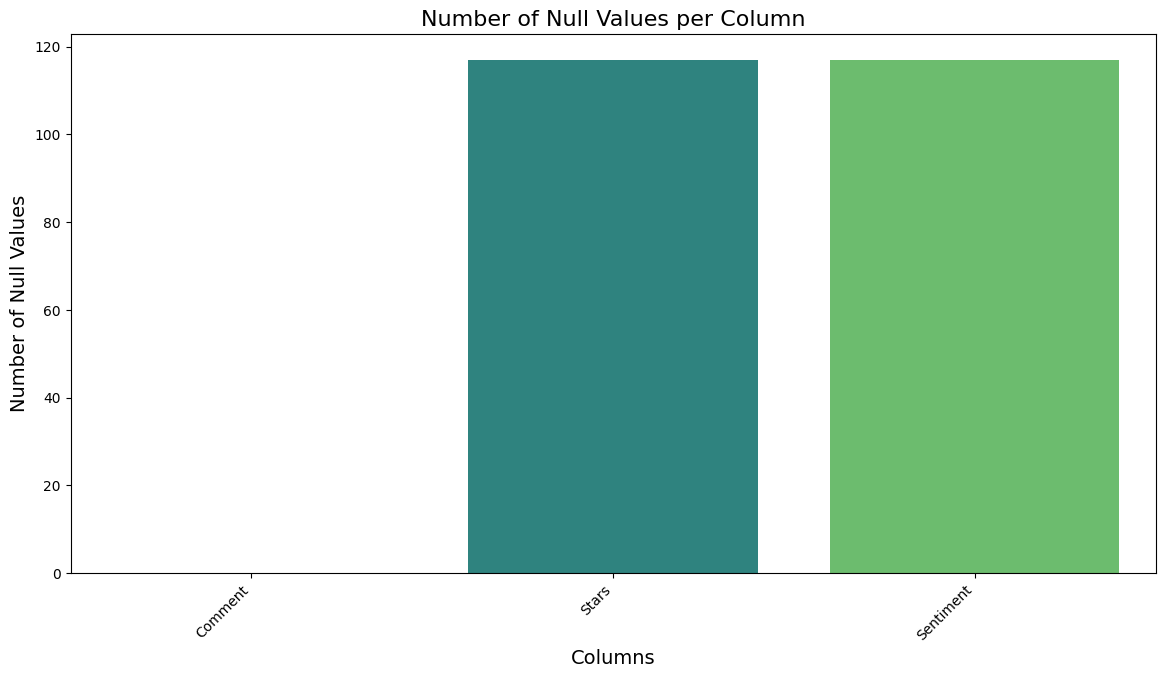

In [12]:
# Tính tổng số giá trị null theo từng cột
nulls_per_column = df.isnull().sum()

# Tạo DataFrame từ nulls_per_column để dễ dàng vẽ biểu đồ
nulls_df = nulls_per_column.reset_index()
nulls_df.columns = ['Column', 'Null Values']

# Tạo biểu đồ cột sử dụng seaborn với màu sắc và chỉnh sửa
plt.figure(figsize=(14, 7))
sns.barplot(x='Column', y='Null Values', data=nulls_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Null Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Null Values', fontsize=14)
plt.show()

In [13]:
# Tách các cột số và các cột không phải số
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_num_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Tạo DataFrame chỉ chứa các cột số
num_df = df[num_cols]



In [14]:
import pandas as pd
from sklearn.impute import KNNImputer

# Áp dụng KNN imputation cho các cột số
imputer = KNNImputer(n_neighbors=5)
num_df_imputed = pd.DataFrame(imputer.fit_transform(num_df), columns=num_df.columns)

# Kết hợp lại các cột số và các cột không phải số sau khi xử lý
df_imputed = pd.concat([num_df_imputed, df[non_num_cols]], axis=1)

# Kiểm tra thông tin dataset sau khi xử lý
print('Dataset after handling null values:')
print(df_imputed.info())

Dataset after handling null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Stars      3796 non-null   float64
 1   Comment    3796 non-null   object 
 2   Sentiment  3679 non-null   object 
dtypes: float64(1), object(2)
memory usage: 89.2+ KB
None


In [15]:
df


,Comment,Stars,Sentiment
0,I completed running New York Marathon requeste...,1.0,Negative
1,My appointment time auto repairs required earl...,1.0,Negative
2,Whether I using Uber ride service Uber Eats or...,1.0,Negative
3,Why hard understand I trying retrieve Uber cab...,1.0,Negative
4,I South Beach FL I staying major hotel ordered...,1.0,Negative
...,...,...,...
3795,everyone knows uber is fast but when you had ...,2.0,Negative
3796,For a service that asks for your credit card n...,1.0,Negative
3797,"great service, but hiring drivers who do not k...",2.0,Negative
3798,Uber has several problems that make it a poor ...,1.0,Negative


In [16]:
def label_sentiment(stars):
    if stars <3:
        return 'Negative'
    elif stars ==3:
        return 'Neutral'
    else: 
        return 'Positive'
    
df['Sentiment'] = df['Stars']. apply(label_sentiment)

print(df)

                                                Comment  Stars Sentiment
0     I completed running New York Marathon requeste...    1.0  Negative
1     My appointment time auto repairs required earl...    1.0  Negative
2     Whether I using Uber ride service Uber Eats or...    1.0  Negative
3     Why hard understand I trying retrieve Uber cab...    1.0  Negative
4     I South Beach FL I staying major hotel ordered...    1.0  Negative
...                                                 ...    ...       ...
3795  everyone knows uber  is fast but when you had ...    2.0  Negative
3796  For a service that asks for your credit card n...    1.0  Negative
3797  great service, but hiring drivers who do not k...    2.0  Negative
3798  Uber has several problems that make it a poor ...    1.0  Negative
3799  Uber is kind of like magic. You punch a few bu...    5.0  Positive

[3796 rows x 3 columns]


In [17]:
df.dropna(inplace=True)

In [18]:
#checking for nulls
null_count = df.isnull().sum()
null_count

Comment      0
Stars        0
Sentiment    0
dtype: int64

In [19]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [20]:
import re
import string
df['Comment_clean'] = df['Comment'].apply(clean_text)
df.head()


,Comment,Stars,Sentiment,Comment_clean
0,I completed running New York Marathon requeste...,1.0,Negative,i completed running new york marathon requeste...
1,My appointment time auto repairs required earl...,1.0,Negative,my appointment time auto repairs required earl...
2,Whether I using Uber ride service Uber Eats or...,1.0,Negative,whether i using uber ride service uber eats or...
3,Why hard understand I trying retrieve Uber cab...,1.0,Negative,why hard understand i trying retrieve uber cab...
4,I South Beach FL I staying major hotel ordered...,1.0,Negative,i south beach fl i staying major hotel ordered...


In [21]:
#!pip install nltk spacy
#!python -m spacy dow

In [22]:
#nload en_core_web_sm


In [23]:
#!pip install imbalanced-learn


In [24]:
#!pip uninstall scikit-learn imbalanced-learn -y


In [25]:
#!pip uninstall scikit-learn imbalanced-learn
#!pip install scikit-learn imbalanced-learn


In [26]:
#pip install --upgrade scikit-learn imbalanced-learn


In [27]:
#!pip install scikit-learn==0.24.2 imbalanced-learn==0.8.1


In [28]:
#Kiểm tra cài đặt
import sklearn
import imblearn

print(sklearn.__version__)
print(imblearn.__version__)


1.5.0
0.12.3


In [29]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [30]:
# Đảm bảo rằng bạn đã tải xuống các tài nguyên cần thiết
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/daohuong65/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/daohuong65/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
# Tải mô hình tiếng Anh từ spaCy
nlp = spacy.load('en_core_web_sm')


In [32]:
# Hàm tiền xử lý văn bản
def preprocess_text(doc):
    # Đảm bảo đầu vào là chuỗi
    if not isinstance(doc, str):
        doc = str(doc)
    # Tokenization và normalization
    doc = doc.lower()  # Chuyển thành chữ thường
    doc = re.sub(r'\d+', '', doc)  # Loại bỏ chữ số
    doc = re.sub(r'[^\w\s]', '', doc)  # Loại bỏ dấu câu
    tokens = word_tokenize(doc)  # Tokenization
    # Tokenization
    tokens = doc.split()
    # Xóa ký tự đặc biệt và số
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    # Loại bỏ stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # POS tagging và phân tích hình thái sử dụng spaCy
    doc = nlp(' '.join(tokens))
    processed_tokens = [(token.text, token.lemma_, token.pos_) for token in doc]

    return processed_tokens

# Áp dụng tiền xử lý lên cột 'Comment'
df['Processed_Comment'] = df['Comment'].apply(preprocess_text)

print(df[['Comment', 'Processed_Comment']])

                                                Comment  \
0     I completed running New York Marathon requeste...   
1     My appointment time auto repairs required earl...   
2     Whether I using Uber ride service Uber Eats or...   
3     Why hard understand I trying retrieve Uber cab...   
4     I South Beach FL I staying major hotel ordered...   
...                                                 ...   
3795  everyone knows uber  is fast but when you had ...   
3796  For a service that asks for your credit card n...   
3797  great service, but hiring drivers who do not k...   
3798  Uber has several problems that make it a poor ...   
3799  Uber is kind of like magic. You punch a few bu...   

                                      Processed_Comment  
0     [(complet, complet, PROPN), (run, run, VERB), ...  
1     [(appoint, appoint, VERB), (time, time, NOUN),...  
2     [(whether, whether, SCONJ), (use, use, VERB), ...  
3     [(hard, hard, ADV), (understand, understand, V...  
4

In [33]:

# Gán nhãn sentiment dựa trên giá trị của stars
df['Sentiment'] = df['Stars'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))

# Tải xuống stopwords
import nltk
nltk.download('stopwords')

# Tokenization, normalization, stopword removal, and stemming
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(doc):
    # Đảm bảo đầu vào là chuỗi
    if not isinstance(doc, str):
        doc = str(doc)
    # Chuyển văn bản sang chữ thường
    doc = doc.lower()
    # Xóa ký tự đặc biệt và số
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    # Tokenization
    tokens = doc.split()
    # Loại bỏ stopwords và stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return tokens  # Trả về danh sách từ

# Áp dụng hàm preprocess_text lên cột Comment
df['Processed_Comment'] = df['Comment'].apply(preprocess_text)

# Chuyển đổi từ danh sách các từ sang chuỗi
df['Processed_Comment'] = df['Processed_Comment'].apply(lambda x: ' '.join(map(str, x)))

# Kiểm tra kết quả tiền xử lý
print(df[['Comment', 'Processed_Comment']])

# Kiểm tra loại dữ liệu của từng phần tử trong cột 'Processed_Comment'
print("Data types in 'Processed_Comment' column:")
print(df['Processed_Comment'].apply(type).unique())

# Kiểm tra ví dụ một vài phần tử trong cột 'Processed_Comment'
print("\nExample processed comments:")
print(df['Processed_Comment'].head())

# Vector hóa dữ liệu
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Comment'])
y = df['Sentiment']

# Áp dụng SMOTE để xử lý mất cân bằng dữ liệu
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Kiểm tra kết quả
print(f"Original dataset shape: {dict(pd.Series(y).value_counts())}")
print(f"Resampled dataset shape: {dict(pd.Series(y_resampled).value_counts())}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/daohuong65/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Comment  \
0     I completed running New York Marathon requeste...   
1     My appointment time auto repairs required earl...   
2     Whether I using Uber ride service Uber Eats or...   
3     Why hard understand I trying retrieve Uber cab...   
4     I South Beach FL I staying major hotel ordered...   
...                                                 ...   
3795  everyone knows uber  is fast but when you had ...   
3796  For a service that asks for your credit card n...   
3797  great service, but hiring drivers who do not k...   
3798  Uber has several problems that make it a poor ...   
3799  Uber is kind of like magic. You punch a few bu...   

                                      Processed_Comment  
0     complet run new york marathon request uber poo...  
1     appoint time auto repair requir earli avail me...  
2     whether use uber ride servic uber eat order fo...  
3     hard understand tri retriev uber cab email dif...  
4

In [34]:

# Huấn luyện mô hình Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu quả của mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7838888888888889

Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.95      0.81       594
     Neutral       0.86      0.73      0.79       605
    Positive       0.83      0.68      0.75       601

    accuracy                           0.78      1800
   macro avg       0.80      0.78      0.78      1800
weighted avg       0.80      0.78      0.78      1800



In [35]:
import pickle

In [36]:
import os
import pickle
from sklearn.naive_bayes import MultinomialNB

# Ensure the directory exists
os.makedirs('Models', exist_ok=True)

# Save the Naive Bayes classifier
model = MultinomialNB()
pickle.dump(model, open('Models/MultinomialNB.pkl', 'wb'))


In [37]:
# Kiểm tra loại dữ liệu của từng phần tử trong cột 'Processed_Comment'
print("Data types in 'Processed_Comment' column:")
print(df['Processed_Comment'].apply(type).unique())

# Kiểm tra ví dụ một vài phần tử trong cột 'Processed_Comment'
print("\nExample processed comments:")
print(df['Processed_Comment'].head())

Data types in 'Processed_Comment' column:
[<class 'str'>]

Example processed comments:
0    complet run new york marathon request uber poo...
1    appoint time auto repair requir earli avail me...
2    whether use uber ride servic uber eat order fo...
3    hard understand tri retriev uber cab email dif...
4    south beach fl stay major hotel order uber dri...
Name: Processed_Comment, dtype: object


In [38]:
#Cách 1: Kiểm tra trực quan: xem xét một số mẫu dữ liệu trước và sau khi tiền xử lý 
print("Before preprocessing:")
print(df[['Comment']].head())

print("\nAfter preprocessing:")
print(df[['Processed_Comment']].head())


Before preprocessing:
                                             Comment
0  I completed running New York Marathon requeste...
1  My appointment time auto repairs required earl...
2  Whether I using Uber ride service Uber Eats or...
3  Why hard understand I trying retrieve Uber cab...
4  I South Beach FL I staying major hotel ordered...

After preprocessing:
                                   Processed_Comment
0  complet run new york marathon request uber poo...
1  appoint time auto repair requir earli avail me...
2  whether use uber ride servic uber eat order fo...
3  hard understand tri retriev uber cab email dif...
4  south beach fl stay major hotel order uber dri...


In [39]:
#Cách 2: Thống kê cơ bản
# Số lượng từ trước khi tiền xử lý
df['Word_Count_Before'] = df['Comment'].apply(lambda x: len(word_tokenize(x)))

# Số lượng từ sau khi tiền xử lý
df['Word_Count_After'] = df['Processed_Comment'].apply(lambda x: len(x))

print("Word count before preprocessing:")
print(df['Word_Count_Before'].describe())

print("\nWord count after preprocessing:")
print(df['Word_Count_After'].describe())


Word count before preprocessing:
count    3679.000000
mean       97.889916
std        84.990849
min         1.000000
25%        45.000000
50%        81.000000
75%       129.000000
max      1813.000000
Name: Word_Count_Before, dtype: float64

Word count after preprocessing:
count    3679.000000
mean      308.480294
std       277.879508
min         2.000000
25%       148.000000
50%       249.000000
75%       383.000000
max      4572.000000
Name: Word_Count_After, dtype: float64


In [40]:
print(df.columns)


Index(['Comment', 'Stars', 'Sentiment', 'Comment_clean', 'Processed_Comment',
       'Word_Count_Before', 'Word_Count_After'],
      dtype='object')


In [41]:
df


,Comment,Stars,Sentiment,Comment_clean,Processed_Comment,Word_Count_Before,Word_Count_After
0,I completed running New York Marathon requeste...,1.0,Negative,i completed running new york marathon requeste...,complet run new york marathon request uber poo...,359,1881
1,My appointment time auto repairs required earl...,1.0,Negative,my appointment time auto repairs required earl...,appoint time auto repair requir earli avail me...,169,943
2,Whether I using Uber ride service Uber Eats or...,1.0,Negative,whether i using uber ride service uber eats or...,whether use uber ride servic uber eat order fo...,99,534
3,Why hard understand I trying retrieve Uber cab...,1.0,Negative,why hard understand i trying retrieve uber cab...,hard understand tri retriev uber cab email dif...,74,342
4,I South Beach FL I staying major hotel ordered...,1.0,Negative,i south beach fl i staying major hotel ordered...,south beach fl stay major hotel order uber dri...,55,251
...,...,...,...,...,...,...,...
3795,everyone knows uber is fast but when you had ...,2.0,Negative,everyone knows uber is fast but when you had ...,everyon know uber fast coupl drink night want ...,54,138
3796,For a service that asks for your credit card n...,1.0,Negative,for a service that asks for your credit card n...,servic ask credit card number right bat realli...,104,273
3797,"great service, but hiring drivers who do not k...",2.0,Negative,great service but hiring drivers who do not kn...,great servic hire driver know way around town ...,42,113
3798,Uber has several problems that make it a poor ...,1.0,Negative,uber has several problems that make it a poor ...,uber sever problem make poor experi consum imh...,232,584


In [42]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [43]:
# Xác định các khía cạnh cần phân loại
aspects = ['Service', 'Attitude', 'Technology']

# Xây dựng mô hình phân loại đa nhãn
clf = MultiOutputClassifier(DecisionTreeClassifier())

# Vector hóa dữ liệu văn bản
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Comment'])

In [44]:
# Import các thư viện cần thiết
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

# Tạo từ điển từ khóa cho các khía cạnh
aspect_keywords = {
    'Service': ['service', 'support', 'help', 'uber', 'driver', 'time', 'car'],
    'Attitude': ['attitude', 'behavior', 'demeanor', 'manners', 'driver' ],
    'Technology': ['technology', 'tech', 'system', 'equipment', 'charg', 'car']
}

# Tạo các cột đánh dấu sự hiện diện của các từ khóa
for aspect, keywords in aspect_keywords.items():
    df[aspect] = df['Processed_Comment'].apply(lambda x: 1 if any(keyword in x for keyword in keywords) else 0)


# Xây dựng mô hình phân loại đa nhãn
clf = MultiOutputClassifier(DecisionTreeClassifier())

# Vector hóa dữ liệu văn bản
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Comment'])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, df[['Service', 'Attitude', 'Technology']], test_size=0.2, random_state=42)

# Huấn luyện mô hình
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá mô hình
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Tính toán kết quả của mỗi khía cạnh
for aspect in aspect_keywords.keys():
    aspect_accuracy = np.mean(y_pred[:, list(aspect_keywords.keys()).index(aspect)] == y_test[aspect])
    print(f"Accuracy for {aspect}: {aspect_accuracy}")


Accuracy: 0.9972826086956522
Accuracy for Service: 0.9972826086956522
Accuracy for Attitude: 1.0
Accuracy for Technology: 0.9945652173913043


In [45]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, df[['Service', 'Attitude', 'Technology']], test_size=0.2, random_state=42)

# Xây dựng mô hình phân loại đa nhãn với Naive Bayes
clf = MultiOutputClassifier(MultinomialNB())

# Huấn luyện mô hình
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá mô hình
for i, aspect in enumerate(aspect_keywords.keys()):
    print(f"Classification Report for {aspect}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    
# Tính toán độ chính xác tổng thể cho mỗi khía cạnh
accuracy = {aspect: accuracy_score(y_test[aspect], y_pred[:, i]) for i, aspect in enumerate(aspect_keywords.keys())}
print("Accuracy for each aspect:", accuracy)

Classification Report for Service:
              precision    recall  f1-score   support

           0       0.71      0.10      0.18        48
           1       0.94      1.00      0.97       688

    accuracy                           0.94       736
   macro avg       0.83      0.55      0.58       736
weighted avg       0.93      0.94      0.92       736

Classification Report for Attitude:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       305
           1       0.83      0.96      0.89       431

    accuracy                           0.86       736
   macro avg       0.88      0.84      0.85       736
weighted avg       0.87      0.86      0.86       736

Classification Report for Technology:
              precision    recall  f1-score   support

           0       0.94      0.66      0.78       258
           1       0.84      0.98      0.91       478

    accuracy                           0.87       736
   macro avg       

In [46]:
df


,Comment,Stars,Sentiment,Comment_clean,Processed_Comment,Word_Count_Before,Word_Count_After,Service,Attitude,Technology
0,I completed running New York Marathon requeste...,1.0,Negative,i completed running new york marathon requeste...,complet run new york marathon request uber poo...,359,1881,1,1,1
1,My appointment time auto repairs required earl...,1.0,Negative,my appointment time auto repairs required earl...,appoint time auto repair requir earli avail me...,169,943,1,1,0
2,Whether I using Uber ride service Uber Eats or...,1.0,Negative,whether i using uber ride service uber eats or...,whether use uber ride servic uber eat order fo...,99,534,1,1,1
3,Why hard understand I trying retrieve Uber cab...,1.0,Negative,why hard understand i trying retrieve uber cab...,hard understand tri retriev uber cab email dif...,74,342,1,0,1
4,I South Beach FL I staying major hotel ordered...,1.0,Negative,i south beach fl i staying major hotel ordered...,south beach fl stay major hotel order uber dri...,55,251,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3795,everyone knows uber is fast but when you had ...,2.0,Negative,everyone knows uber is fast but when you had ...,everyon know uber fast coupl drink night want ...,54,138,1,0,0
3796,For a service that asks for your credit card n...,1.0,Negative,for a service that asks for your credit card n...,servic ask credit card number right bat realli...,104,273,1,0,1
3797,"great service, but hiring drivers who do not k...",2.0,Negative,great service but hiring drivers who do not kn...,great servic hire driver know way around town ...,42,113,1,1,0
3798,Uber has several problems that make it a poor ...,1.0,Negative,uber has several problems that make it a poor ...,uber sever problem make poor experi consum imh...,232,584,1,1,1


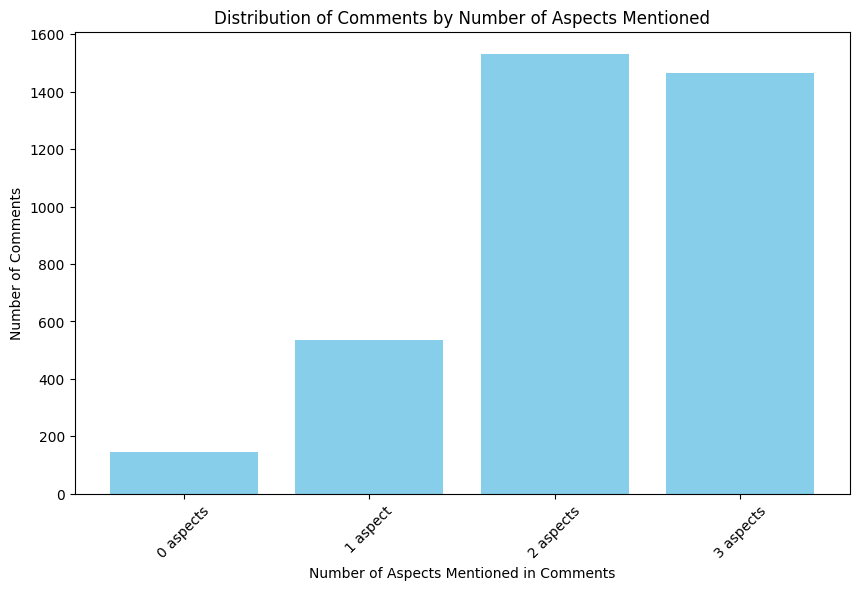

In [47]:
# Đếm số lượng khía cạnh được nhắc đến trong mỗi comment
df['Aspect_Count'] = df[['Service', 'Attitude', 'Technology']].sum(axis=1)

# Liệt kê các khía cạnh được nhắc đến trong mỗi comment
def list_mentioned_aspects(row):
    aspects = []
    for aspect in aspect_keywords.keys():
        if row[aspect] == 1:
            aspects.append(aspect)
    return aspects

df['Mentioned_Aspects'] = df.apply(list_mentioned_aspects, axis=1)
# Vẽ biểu đồ cột
aspect_count_distribution = df['Aspect_Count'].value_counts().sort_index()
aspect_count_labels = ['0 aspects', '1 aspect', '2 aspects', '3 aspects']

plt.figure(figsize=(10, 6))
plt.bar(aspect_count_labels, aspect_count_distribution, color='skyblue')
plt.xlabel('Number of Aspects Mentioned in Comments')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments by Number of Aspects Mentioned')
plt.xticks(rotation=45)
plt.show()


In [48]:
from collections import Counter
# Tạo CountVectorizer để đếm tần suất xuất hiện của các từ
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Comment'])
word_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).A1))

# Lọc bỏ các từ khóa liên quan đến các khía cạnh đã xác định
all_aspect_keywords = set(sum(aspect_keywords.values(), []))
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in all_aspect_keywords}

# Tìm các từ khóa xuất hiện nhiều nhất
most_common_keywords = Counter(filtered_word_counts).most_common(10)
# Hiển thị kết quả
print("Top 10 từ khóa xuất hiện nhiều nhất ngoài các khía cạnh đã xác định:")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")

Top 10 từ khóa xuất hiện nhiều nhất ngoài các khía cạnh đã xác định:
ride: 2331
use: 2203
get: 2188
servic: 1475
custom: 1313
cancel: 1230
call: 1221
go: 1196
trip: 1147
account: 1136


In [49]:
# Từ điển từ khóa tích cực, tiêu cực và trung lập
positive_keywords = ['excellent', 'good', 'great', 'positive', 'advanced', 'friendly','ok']
negative_keywords = ['bad', 'disliked', 'poor', 'negative', 'slow', 'outdated','not', 'hard']
neutral_keywords = ['neutral', 'average', 'okay', 'not', 'but']

def determine_sentiment(tokens, positive_keywords, negative_keywords, neutral_keywords):
    sentiment_score = 0
    for token in tokens:
        if token in positive_keywords:
            sentiment_score += 1
        elif token in negative_keywords:
            sentiment_score -= 1
    if sentiment_score > 0:
        return 'Good'
    elif sentiment_score < 0:
        return 'Bad'
    else:
        return 'Neutral'

# Tạo các cột đánh dấu sự hiện diện của các từ khóa và xác định sentiment
for aspect, keywords in aspect_keywords.items():
    df[aspect] = df['Processed_Comment'].apply(lambda x: 1 if any(keyword in x for keyword in keywords) else 0)
    df[f'{aspect}_Sentiment'] = df.apply(lambda row: determine_sentiment(row['Processed_Comment'].split(), positive_keywords, negative_keywords, neutral_keywords) if row[aspect] == 1 else 'Not Mentioned', axis=1)

# Hiển thị kết quả
print(df[['Comment', 'Service_Sentiment', 'Attitude_Sentiment', 'Technology_Sentiment']])

                                                Comment Service_Sentiment  \
0     I completed running New York Marathon requeste...              Good   
1     My appointment time auto repairs required earl...              Good   
2     Whether I using Uber ride service Uber Eats or...           Neutral   
3     Why hard understand I trying retrieve Uber cab...           Neutral   
4     I South Beach FL I staying major hotel ordered...           Neutral   
...                                                 ...               ...   
3795  everyone knows uber  is fast but when you had ...           Neutral   
3796  For a service that asks for your credit card n...           Neutral   
3797  great service, but hiring drivers who do not k...              Good   
3798  Uber has several problems that make it a poor ...               Bad   
3799  Uber is kind of like magic. You punch a few bu...           Neutral   

     Attitude_Sentiment Technology_Sentiment  
0                  Good     

In [50]:
df

,Comment,Stars,Sentiment,Comment_clean,Processed_Comment,Word_Count_Before,Word_Count_After,Service,Attitude,Technology,Aspect_Count,Mentioned_Aspects,Service_Sentiment,Attitude_Sentiment,Technology_Sentiment
0,I completed running New York Marathon requeste...,1.0,Negative,i completed running new york marathon requeste...,complet run new york marathon request uber poo...,359,1881,1,1,1,3,"[Service, Attitude, Technology]",Good,Good,Good
1,My appointment time auto repairs required earl...,1.0,Negative,my appointment time auto repairs required earl...,appoint time auto repair requir earli avail me...,169,943,1,1,0,2,"[Service, Attitude]",Good,Good,Not Mentioned
2,Whether I using Uber ride service Uber Eats or...,1.0,Negative,whether i using uber ride service uber eats or...,whether use uber ride servic uber eat order fo...,99,534,1,1,1,3,"[Service, Attitude, Technology]",Neutral,Neutral,Neutral
3,Why hard understand I trying retrieve Uber cab...,1.0,Negative,why hard understand i trying retrieve uber cab...,hard understand tri retriev uber cab email dif...,74,342,1,0,1,2,"[Service, Technology]",Neutral,Not Mentioned,Neutral
4,I South Beach FL I staying major hotel ordered...,1.0,Negative,i south beach fl i staying major hotel ordered...,south beach fl stay major hotel order uber dri...,55,251,1,1,1,3,"[Service, Attitude, Technology]",Neutral,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,everyone knows uber is fast but when you had ...,2.0,Negative,everyone knows uber is fast but when you had ...,everyon know uber fast coupl drink night want ...,54,138,1,0,0,1,[Service],Neutral,Not Mentioned,Not Mentioned
3796,For a service that asks for your credit card n...,1.0,Negative,for a service that asks for your credit card n...,servic ask credit card number right bat realli...,104,273,1,0,1,2,"[Service, Technology]",Neutral,Not Mentioned,Neutral
3797,"great service, but hiring drivers who do not k...",2.0,Negative,great service but hiring drivers who do not kn...,great servic hire driver know way around town ...,42,113,1,1,0,2,"[Service, Attitude]",Good,Good,Not Mentioned
3798,Uber has several problems that make it a poor ...,1.0,Negative,uber has several problems that make it a poor ...,uber sever problem make poor experi consum imh...,232,584,1,1,1,3,"[Service, Attitude, Technology]",Bad,Bad,Bad


In [51]:
# Xây dựng mô hình cho từng khía cạnh
for aspect in aspect_keywords.keys():
    # Chọn dữ liệu cho khía cạnh này
    df_aspect = df[df[aspect] == 1]
    if df_aspect.empty:
        continue

    # Vector hóa dữ liệu
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df_aspect['Processed_Comment'])
    y = df_aspect[f'{aspect}_Sentiment']

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Dự đoán và đánh giá
    y_pred = model.predict(X_test)
    print(f"Aspect: {aspect}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    

# Kiểm tra kết quả
# print(df[['Comment', 'Service_Sentiment', 'Attitude_Sentiment', 'Technology_Sentiment']])


Aspect: Service
              precision    recall  f1-score   support

         Bad       0.63      0.43      0.51        56
        Good       0.76      0.52      0.62       122
     Neutral       0.85      0.94      0.89       520

    accuracy                           0.83       698
   macro avg       0.75      0.63      0.67       698
weighted avg       0.82      0.83      0.81       698

Accuracy: 0.826647564469914

Aspect: Attitude
              precision    recall  f1-score   support

         Bad       0.67      0.51      0.58        39
        Good       0.75      0.57      0.65        76
     Neutral       0.85      0.93      0.89       321

    accuracy                           0.83       436
   macro avg       0.76      0.67      0.71       436
weighted avg       0.82      0.83      0.82       436

Accuracy: 0.8279816513761468

Aspect: Technology
              precision    recall  f1-score   support

         Bad       0.64      0.38      0.48        47
        Good      

In [52]:
# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print(f"Aspect: {aspect}")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

Aspect: Technology
              precision    recall  f1-score   support

         Bad       0.64      0.38      0.48        47
        Good       0.65      0.53      0.58        66
     Neutral       0.86      0.93      0.89       352

    accuracy                           0.82       465
   macro avg       0.72      0.62      0.65       465
weighted avg       0.81      0.82      0.81       465

Accuracy: 0.8193548387096774



In [53]:
import os
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming you have the DataFrame `df` and the dictionary `aspect_keywords`
# and also the column 'Processed_Comment' for vectorization
# and sentiment columns like 'Service_Sentiment', 'Attitude_Sentiment', etc.

# Ensure the directory exists
os.makedirs('Models', exist_ok=True)

# Train and save a model for each aspect
for aspect in aspect_keywords.keys():
    # Filter the data for this aspect
    df_aspect = df[df[aspect] == 1]
    if df_aspect.empty:
        continue

    # Vectorize the data
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df_aspect['Processed_Comment'])
    y = df_aspect[f'{aspect}_Sentiment']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Naive Bayes model
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    print(f"Aspect: {aspect}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

    # Save the model
    model_filename = f'Models/MultinomialNB_{aspect}.pkl'
    with open(model_filename, 'wb') as model_file:
        pickle.dump(model, model_file)

    # Save the vectorizer
    vectorizer_filename = f'Models/Vectorizer_{aspect}.pkl'
    with open(vectorizer_filename, 'wb') as vectorizer_file:
        pickle.dump(vectorizer, vectorizer_file)

# Check the results
# print(df[['Comment', 'Service_Sentiment', 'Attitude_Sentiment', 'Technology_Sentiment']])


Aspect: Service
              precision    recall  f1-score   support

         Bad       0.63      0.43      0.51        56
        Good       0.76      0.52      0.62       122
     Neutral       0.85      0.94      0.89       520

    accuracy                           0.83       698
   macro avg       0.75      0.63      0.67       698
weighted avg       0.82      0.83      0.81       698

Accuracy: 0.826647564469914

Aspect: Attitude
              precision    recall  f1-score   support

         Bad       0.67      0.51      0.58        39
        Good       0.75      0.57      0.65        76
     Neutral       0.85      0.93      0.89       321

    accuracy                           0.83       436
   macro avg       0.76      0.67      0.71       436
weighted avg       0.82      0.83      0.82       436

Accuracy: 0.8279816513761468

Aspect: Technology
              precision    recall  f1-score   support

         Bad       0.64      0.38      0.48        47
        Good      

RANDOM FOREST


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import pickle

# Giả sử bạn có DataFrame df chứa dữ liệu đã xử lý
# df = pd.read_csv('your_data.csv')  # Ví dụ nếu bạn muốn đọc dữ liệu từ file CSV

# Vector hóa dữ liệu
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Comment'])
y = df['Sentiment']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu quả của mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Ensure the directory exists
os.makedirs('Models', exist_ok=True)

# Save the Random Forest model
with open('Models/RandomForest.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('Models/Vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


Accuracy: 0.9375

Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      1.00      0.96       611
     Neutral       0.92      0.57      0.71        21
    Positive       0.97      0.67      0.80       104

    accuracy                           0.94       736
   macro avg       0.94      0.75      0.82       736
weighted avg       0.94      0.94      0.93       736



In [55]:
import pandas as pd
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Ensure the directory exists
os.makedirs('Models', exist_ok=True)

# Example data and aspect keywords (replace with your actual data and keywords)
# df = pd.read_csv('your_data.csv')  # Load your data
# aspect_keywords = {'Service': ['service'], 'Attitude': ['attitude'], 'Technology': ['technology']}  # Example aspects

# Xây dựng mô hình cho từng khía cạnh
for aspect in aspect_keywords.keys():
    # Chọn dữ liệu cho khía cạnh này
    df_aspect = df[df[aspect] == 1]
    if df_aspect.empty:
        continue

    # Vector hóa dữ liệu
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df_aspect['Processed_Comment'])
    y = df_aspect[f'{aspect}_Sentiment']

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình Random Forest
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Dự đoán và đánh giá
    y_pred = model.predict(X_test)
    print(f"Aspect: {aspect}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

    # Save the model
    model_filename = f'Models/RandomForest_{aspect}.pkl'
    with open(model_filename, 'wb') as model_file:
        pickle.dump(model, model_file)

    # Save the vectorizer
    vectorizer_filename = f'Models/Vectorizer_{aspect}.pkl'
    with open(vectorizer_filename, 'wb') as vectorizer_file:
        pickle.dump(vectorizer, vectorizer_file)


Aspect: Service
              precision    recall  f1-score   support

         Bad       0.95      0.93      0.94        56
        Good       0.99      0.98      0.98       122
     Neutral       0.99      0.99      0.99       520

    accuracy                           0.99       698
   macro avg       0.98      0.97      0.97       698
weighted avg       0.99      0.99      0.99       698

Accuracy: 0.9856733524355301

Aspect: Attitude
              precision    recall  f1-score   support

         Bad       0.93      0.72      0.81        39
        Good       0.90      0.93      0.92        76
     Neutral       0.95      0.97      0.96       321

    accuracy                           0.94       436
   macro avg       0.93      0.87      0.90       436
weighted avg       0.94      0.94      0.94       436

Accuracy: 0.9403669724770642

Aspect: Technology
              precision    recall  f1-score   support

         Bad       1.00      0.64      0.78        47
        Good     

LSTM

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

# Giả sử bạn có DataFrame df chứa dữ liệu đã xử lý
# df = pd.read_csv('your_data.csv')  # Ví dụ nếu bạn muốn đọc dữ liệu từ file CSV

# Vector hóa dữ liệu
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Processed_Comment'])
X = tokenizer.texts_to_sequences(df['Processed_Comment'])
X = pad_sequences(X)

# Chuyển đổi nhãn thành số
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Sentiment'])

# Đảm bảo X và y có cùng số lượng mẫu
X, y = np.array(X), np.array(y)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Sequential
model = Sequential()

# Thêm lớp Embedding
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
input_length = X.shape[1]
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))

# Thêm lớp SpatialDropout1D
model.add(SpatialDropout1D(0.2))

# Thêm lớp LSTM
lstm_units = 100
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))

# Thêm lớp Dense
num_classes = len(label_encoder.classes_)
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)



2024-06-04 07:49:05.756371: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 07:49:06.509836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10


/home/daohuong65/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7630 - loss: 0.8544 - val_accuracy: 0.8166 - val_loss: 0.5608
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.8023 - loss: 0.5340 - val_accuracy: 0.8642 - val_loss: 0.4365
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8984 - loss: 0.3467 - val_accuracy: 0.8862 - val_loss: 0.3671
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 36s 985ms/step - accuracy: 0.9294 - loss: 0.2130 - val_accuracy: 0.8964 - val_loss: 0.3454
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9453 - loss: 0.1551 - val_accuracy: 0.8964 - val_loss: 0.3533
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9586 - loss: 0.1112 - val_accuracy: 0.9100 - val_loss: 0.3842
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9605 - loss: 0.0924 - val_accuracy: 0.9083 - val_loss: 0.4033
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.9053 - loss: 0.3371
Accuracy: 0.90625


In [57]:
# Thiết lập tokenizer
tokenizer = Tokenizer(num_words=5000, lower=True)

# Xây dựng mô hình cho từng khía cạnh
for aspect in aspect_keywords.keys():
    # Chọn dữ liệu cho khía cạnh này
    df_aspect = df[df[aspect] == 1]
    if df_aspect.empty:
        continue

    # Vector hóa dữ liệu
    tokenizer.fit_on_texts(df_aspect['Processed_Comment'])
    X = tokenizer.texts_to_sequences(df_aspect['Processed_Comment'])
    X = pad_sequences(X, maxlen=100)  # Padding sequences to the same length
    
    # Chuyển đổi sentiment thành các nhãn số
    le = LabelEncoder()
    y = le.fit_transform(df_aspect[f'{aspect}_Sentiment'])

    # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Xây dựng mô hình LSTM
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))  # Số lớp đầu ra tùy vào số lượng class sentiment

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Huấn luyện mô hình
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

    # Dự đoán và đánh giá
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(f"Aspect: {aspect}")
    print(classification_report(y_test, y_pred_classes, target_names=le.classes_))
    print(f"Accuracy: {accuracy_score(y_test, y_pred_classes)}\n")


Epoch 1/10


/home/daohuong65/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.7085 - loss: 0.8925 - val_accuracy: 0.7818 - val_loss: 0.6487
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.7723 - loss: 0.6376 - val_accuracy: 0.7871 - val_loss: 0.5842
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - accuracy: 0.7997 - loss: 0.5019 - val_accuracy: 0.8140 - val_loss: 0.5551
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.8815 - loss: 0.3279 - val_accuracy: 0.8766 - val_loss: 0.5048
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.9404 - loss: 0.1771 - val_accuracy: 0.8819 - val_loss: 0.4754
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.9611 - loss: 0.1250 - val_accuracy: 0.9016 - val_loss: 0.4093
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.9753 - loss: 0.0840 - val_accuracy: 0.8962 - val_loss: 0.4432
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.9835 - loss: 0.0546 - val_accuracy: 0.8980 - val_

/home/daohuong65/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.6325 - loss: 0.9997 - val_accuracy: 0.7450 - val_loss: 0.7139
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.7231 - loss: 0.7299 - val_accuracy: 0.7450 - val_loss: 0.6707
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.7171 - loss: 0.6588 - val_accuracy: 0.7794 - val_loss: 0.6290
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.8278 - loss: 0.4705 - val_accuracy: 0.8023 - val_loss: 0.5834
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.8741 - loss: 0.2859 - val_accuracy: 0.8338 - val_loss: 0.5356
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.9337 - loss: 0.2000 - val_accuracy: 0.8539 - val_loss: 0.5209
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.9740 - loss: 0.0942 - val_accuracy: 0.8567 - val_loss: 0.5407
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.9890 - loss: 0.0592 - val_accuracy: 0.8768 - val_

/home/daohuong65/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.6596 - loss: 0.9772 - val_accuracy: 0.7527 - val_loss: 0.6947
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.7654 - loss: 0.6610 - val_accuracy: 0.7527 - val_loss: 0.6592
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.7649 - loss: 0.5829 - val_accuracy: 0.7715 - val_loss: 0.6000
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.8391 - loss: 0.4201 - val_accuracy: 0.7930 - val_loss: 0.5913
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.8857 - loss: 0.3032 - val_accuracy: 0.8145 - val_loss: 0.5820
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9382 - loss: 0.1891 - val_accuracy: 0.8548 - val_loss: 0.5864
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.9664 - loss: 0.1288 - val_accuracy: 0.8629 - val_loss: 0.5742
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.9897 - loss: 0.0550 - val_accuracy: 0.8602 - val_